In [4]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np

In [36]:
alphas = [x/100 for x in range(10)]

# Simple Example

In [6]:
for alpha in alphas:  
    clf = Lasso(alpha=alpha)
    clf.fit([[0,0,0], [1.5, 1,1], [1.99, 2,1]], [0, 1, 2])
    print(clf.coef_)
    print(clf.intercept_)
    print(clf.predict([[3.4,2.5,6]]))

[ 1.20216993  0.41072407 -1.21387263]
-4.440892098500626e-16
[-2.16904787]
[0.   0.85 0.  ]
0.15000000000000002
[2.275]
[0.  0.7 0. ]
0.30000000000000004
[2.05]
[0.   0.55 0.  ]
0.44999999999999996
[1.825]
[0.  0.4 0. ]
0.6000000000000004
[1.6]
[0.   0.25 0.  ]
0.75
[1.375]
[0.  0.1 0. ]
0.8999999999999999
[1.15]
[0. 0. 0.]
1.0
[1.]
[0. 0. 0.]
1.0
[1.]
[0. 0. 0.]
1.0
[1.]


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


# Random Example

In [27]:
def create_random_sample_1(x):
    a = x + random.randint(-10, 10)/50
    b = x
    c = random.randint(-10, 100)/10
    d = random.randint(-10, 100)/10
    return [a, b, c, d]

def create_random_sample_2(x):
    split = random.randint(0, 100)/100
    a = x * split
    b = x * (1-split)
    c = x + random.randint(-10, 10)/3
    d = random.randint(-10, 10)
    return [a, b, c, d]

def create_random_sample_3(x):
    a = x + random.randint(-10, 10)/30
    b = x + random.randint(-10, 10)/10
    c = x + random.randint(-10, 10)/4
    d = random.randint(1, 10)
    return [a, b, c, d]

random_sample_func = [create_random_sample_1, create_random_sample_2, create_random_sample_3]

In [28]:
def create_random_data(sample_func):
    data = []
    results = []
    for x in range(-10, 10):
        for _ in range(50):
            data.append(sample_func(x))
            results.append(x)
    return data, results

## Lasso

In [31]:
def run_lasso(sample_func):
    coefficients = [[], [], [], []]
    error = []

    random_test_data, random_test_data_results = create_random_data(sample_func=sample_func)

    for alpha in alphas:  
        clf = Lasso(alpha=alpha)
        clf.fit(random_test_data, random_test_data_results)
        for i, coef in enumerate(clf.coef_):
            coefficients[i].append(coef)
        error.append(np.mean([(clf.predict([sample_func(x)]) - x)**2 for x in range(20)]))
    
    return coefficients, error

In [25]:
def run_lassoCV(sample_func):
    random_test_data, random_test_data_results = create_random_data(sample_func=sample_func)

    clf = LassoCV()
    clf.fit(random_test_data, random_test_data_results)
    error = np.mean([(clf.predict([sample_func(x)]) - x)**2 for x in range(20)])
    
    return clf.coef_, error, clf.alpha_

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


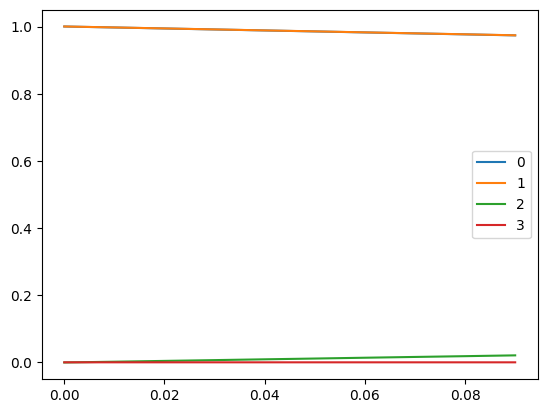

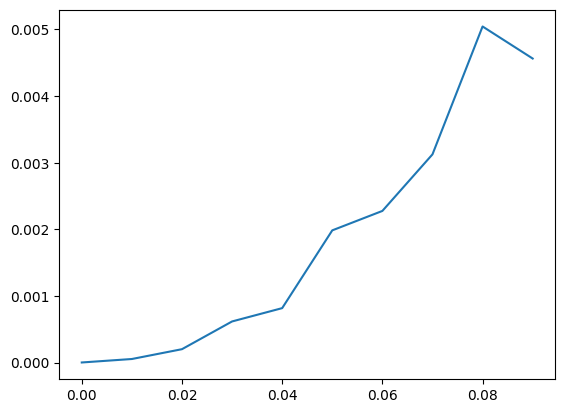

In [37]:
coefficients, error = run_lasso(random_sample_func[1])

for i, coef in enumerate(coefficients):
    plt.plot(alphas, coef, label=i)
plt.legend() 
plt.show()

plt.plot(alphas, error)
plt.show()

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.081e+00, tolerance: 3.325e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: Convergenc

0.03328105999999999
0.03262316666666666
0.03352475


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e+01, tolerance: 3.325e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

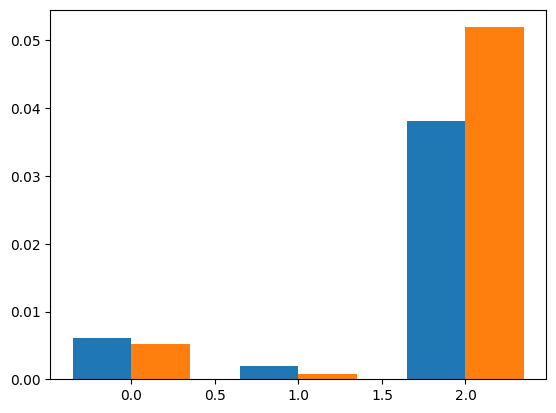

In [40]:
lasso = []
lassoCV = []
x = np.arange(len(random_sample_func))

for func in random_sample_func:
    coefficients_CV, error_CV, alpha_CV = run_lassoCV(sample_func=func)
    temp_coef, temp_err = run_lasso(sample_func=func)

    lasso.append(np.mean(temp_err))
    lassoCV.append(error_CV)
    print(alpha_CV)

width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lasso, width, label='Lasso')
rects2 = ax.bar(x + width/2, lassoCV, width, label='LassoCV')

## Random Forest

In [44]:
def run_random_forest(func, max_depth):
    samples, result = create_random_data(sample_func=func)

    regr = RandomForestRegressor(max_depth=max_depth, random_state=0)
    regr.fit(samples, result)
    return regr

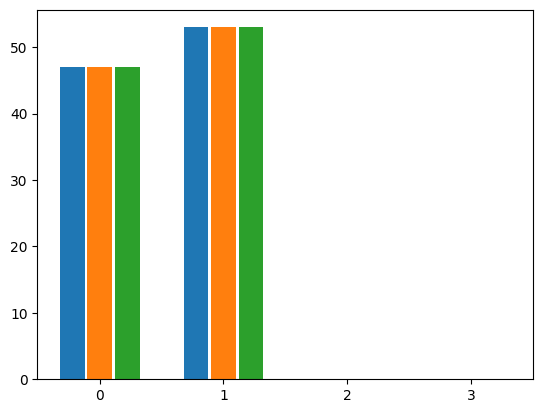

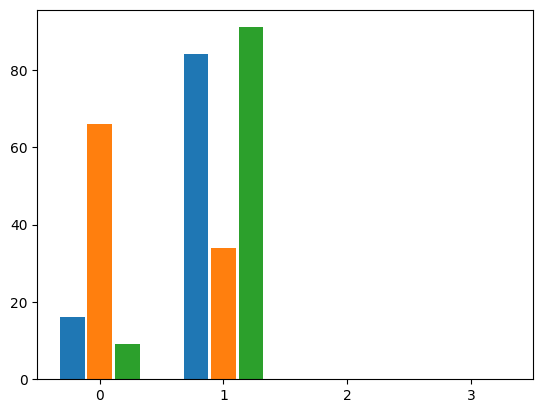

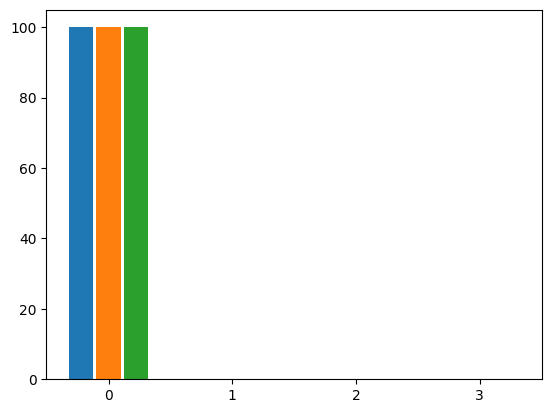

In [91]:
weighted_samples = []
max_depths = [x for x in range(2, 9, 3)]

for func in random_sample_func:
    weighted_depth = []
    for max_depth in max_depths:
        weight_features = [0 for _ in range(4)]
        regr = run_random_forest(func=func, max_depth=max_depth)

        for estimator in regr.estimators_:
            weight_features[estimator.tree_.feature[0]] += 1

        weighted_depth.append(weight_features)
    weighted_samples.append(weighted_depth)

width = 0.2
labels = [x for x in range(4)]

for sample in weighted_samples:
    fig, ax = plt.subplots()
    ax.set_xticks(labels)
    ax.set_xticklabels(labels)
    for i, depth in enumerate(sample):
        ax.bar(x+(i-(len(sample)-1)/2)/(1.5*len(sample)), depth, width)
    plt.show()

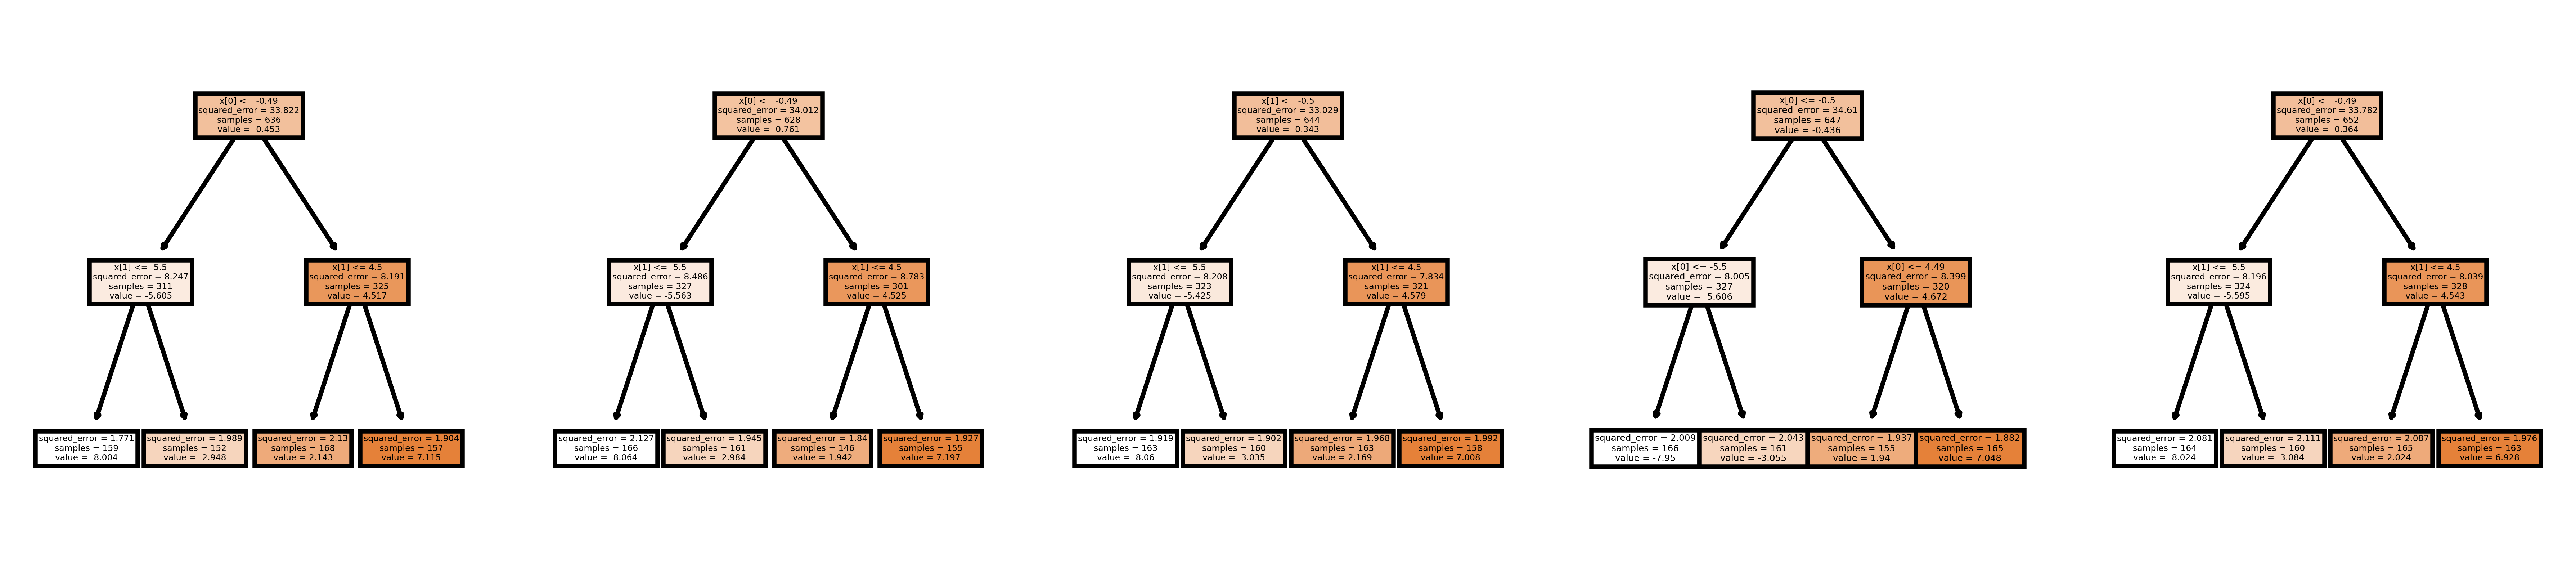

In [27]:
number_of_trees = 5

fig, axes = plt.subplots(nrows = 1,ncols = number_of_trees,figsize = (10,2), dpi=900)
for i in range(number_of_trees):
    tree.plot_tree(regr.estimators_[i], filled = True, ax = axes[i])

# Real Data

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
df = df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [12]:
dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])
y = df['Salary']
X_numerical = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
list_numerical = X_numerical.columns
# Create all features
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [16]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 60.43
R squared test set 33.01


In [17]:
# Training data
mse_train = mean_squared_error(y_train, reg.predict(X_train))
print('MSE training set', round(mse_train, 2))

# Test data
mse_test =mean_squared_error(y_test, reg.predict(X_test))
print('MSE test set', round(mse_test, 2))

MSE training set 80571.73
MSE test set 134426.33


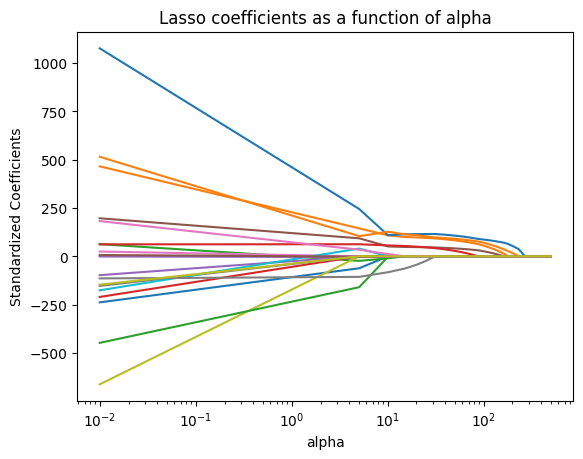

In [18]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [19]:
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [20]:
model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(X_train, y_train)
model.alpha_

2.3441244939374593

In [9]:
np.mean([2, np.nan])

nan